In [17]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [18]:
# Define data directory
data_dir = '/kaggle/input/psoriasis-skin-dataset/PSORIASIS AND NORMAL SKIN'


In [19]:
# Define image data generator without shuffle
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting data into 90% training and 10% validation
)


In [20]:
# Load training data with shuffle
data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Specify that this is for training
    shuffle=True  # Shuffle the data
)


Found 2246 images belonging to 2 classes.


In [21]:
# Load validation data without shuffle
val_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify that this is for validation
)

Found 560 images belonging to 2 classes.


In [22]:
# Define model architecture with 2 neurons in the last Dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 neurons for binary classification
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Train the model
history = model.fit(
    data_loader,
    validation_data=val_data_loader,
    epochs=20,
)

In [25]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)


18/18 - 6s - 310ms/step - accuracy: 0.6250 - loss: 2.0240


In [26]:
# Print evaluation metrics
print('\nTest accuracy:', test_acc)



Test accuracy: 0.625


In [46]:
import numpy as np
from sklearn.metrics import classification_report

# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes, digits = 5))



18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step
              precision    recall  f1-score   support

           0    0.96618   0.95238   0.95923       210
           1    0.97167   0.98000   0.97582       350

    accuracy                        0.96964       560
   macro avg    0.96893   0.96619   0.96753       560
weighted avg    0.96961   0.96964   0.96960       560



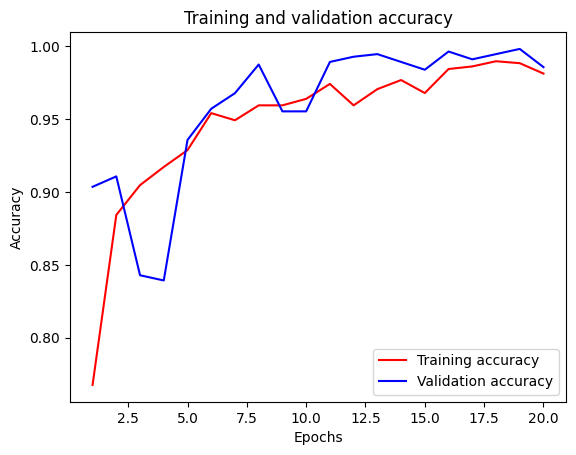

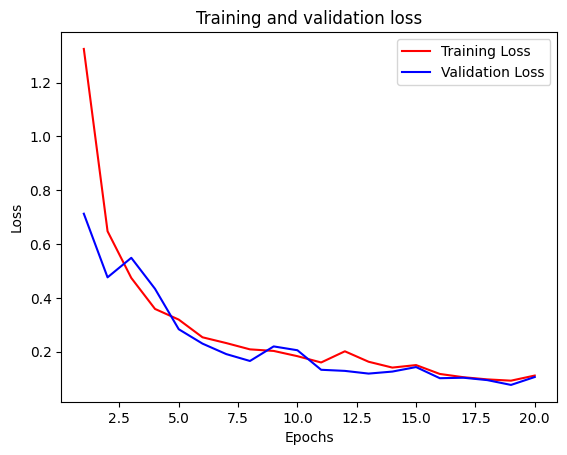

In [28]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

[[  0 210]
 [  0 350]]


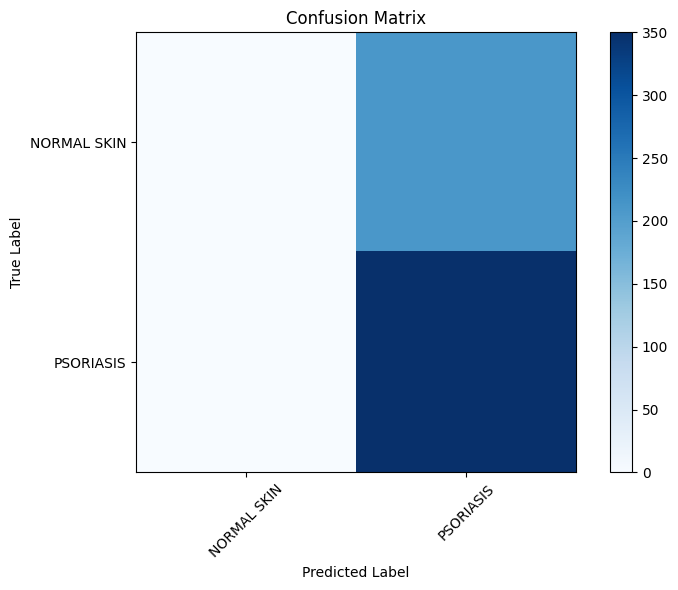

In [29]:
# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Found 2246 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 59s 633ms/step - accuracy: 0.6006 - loss: 0.6964 - val_accuracy: 0.6286 - val_loss: 0.6656
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 508ms/step - accuracy: 0.7560 - loss: 0.5167 - val_accuracy: 0.6125 - val_loss: 0.6548
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 506ms/step - accuracy: 0.7976 - loss: 0.4795 - val_accuracy: 0.6250 - val_loss: 0.9293
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 509ms/step - accuracy: 0.8029 - loss: 0.4543 - val_accuracy: 0.6250 - val_loss: 0.5732
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 500ms/step - accuracy: 0.8259 - loss: 0.4040 - val_accuracy: 0.6232 - val_loss: 0.6156
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 502ms/step - accuracy: 0.8440 - loss: 0.3616 - val_accuracy: 0.6375 - val_loss: 0.5183
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 503ms/step - accuracy: 0.8569 - loss: 0.3496 - val_accuracy: 0.8036 - val_loss: 0.4458
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 504ms/step - accuracy: 0.8795 - loss: 0.3099 - val_accuracy: 0.637

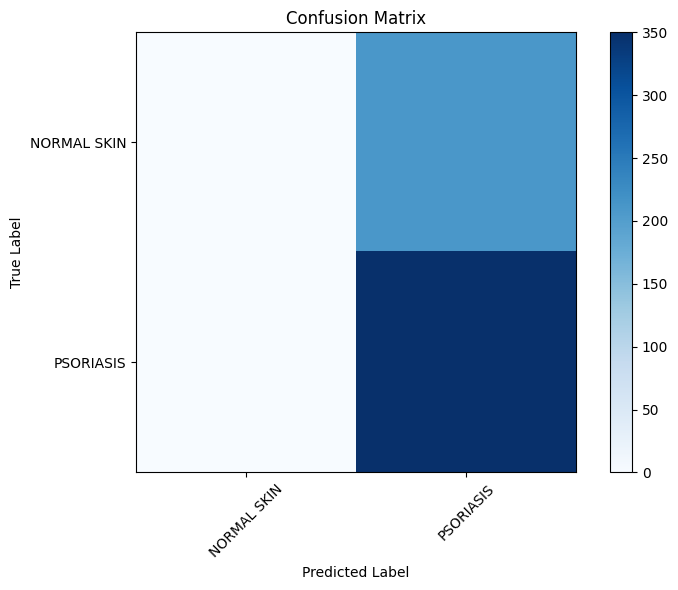

In [30]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary


# Define data generators
image_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # ResNet50 input size
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Train the model
history = model.fit(
    train_data_loader,
    validation_data=val_data_loader,
    epochs=20,
)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)

# Print evaluation metrics
print('\nTest accuracy:', test_acc)




# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [44]:
import numpy as np
from sklearn.metrics import classification_report

# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes, digits = 5))



18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step
              precision    recall  f1-score   support

           0    0.97101   0.95714   0.96403       210
           1    0.97450   0.98286   0.97866       350

    accuracy                        0.97321       560
   macro avg    0.97276   0.97000   0.97135       560
weighted avg    0.97320   0.97321   0.97318       560



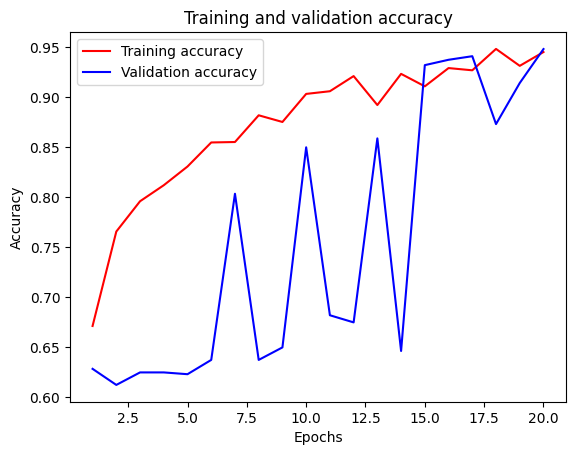

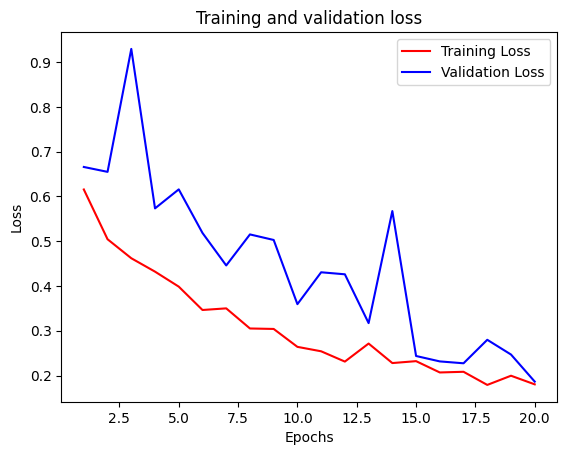

In [32]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 2246 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8724 - loss: 0.2339 - val_accuracy: 0.9929 - val_loss: 0.0284
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 520ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9964 - val_loss: 0.0138
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 513ms/step - accuracy: 0.9981 - loss: 0.0091 - val_accuracy: 0.9946 - val_loss: 0.0210
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 527ms/step - accuracy: 0.9962 - loss: 0.0089 - val_accuracy: 0.9964 - val_loss: 0.0180
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 514ms/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9946 - val_loss: 0.0112
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 518ms/step - accuracy: 0.9974 - loss: 0.0056 - val_accuracy: 0.9982 - val_loss: 0.0120
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 509ms/step - accuracy: 0.9998 - loss: 0.0047 - val_accuracy: 0.9946 - val_loss: 0.0192
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 511ms/step - accuracy: 0.9981 - loss: 0.0055 - val_accuracy: 0.9982 

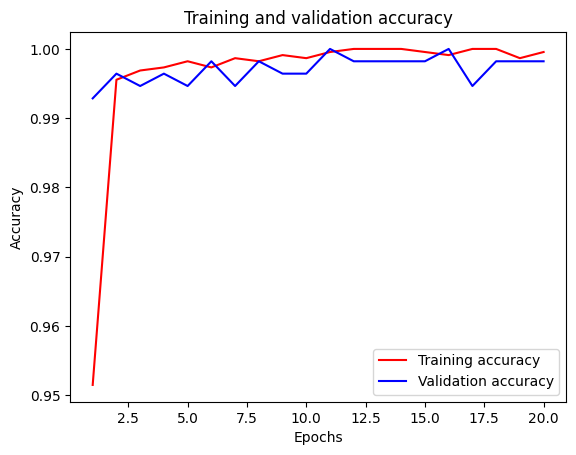

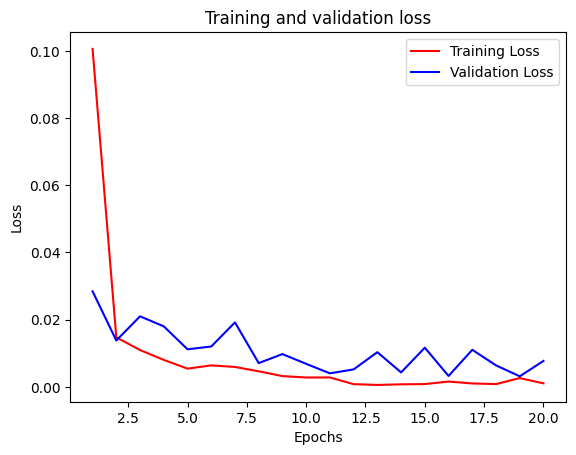

[[198  12]
 [ 27 323]]


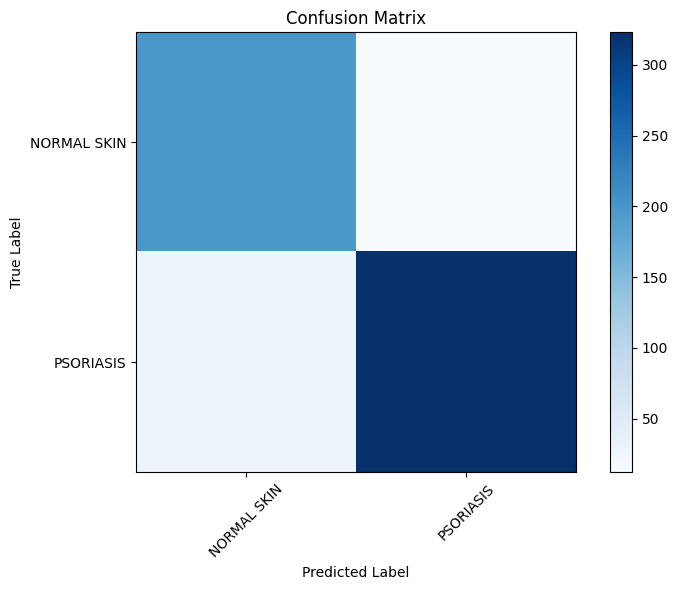

In [33]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
#model.summary()

# Define data generators
image_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # DenseNet121 input size
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Train the model
history = model.fit(
    train_data_loader,
    validation_data=val_data_loader,
    epochs=20,
)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)

# Print evaluation metrics
print('\nTest accuracy:', test_acc)

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [43]:
import numpy as np
from sklearn.metrics import classification_report

# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes, digits = 5))



18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step
              precision    recall  f1-score   support

           0    0.97087   0.95238   0.96154       210
           1    0.97175   0.98286   0.97727       350

    accuracy                        0.97143       560
   macro avg    0.97131   0.96762   0.96941       560
weighted avg    0.97142   0.97143   0.97137       560



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2246 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-14 10:54:59.735451: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-04-14 10:54:59.735524: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-04-14 10:54:59.735543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-04-14 10:54:59.735558: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-04-14 10:54:59.735571: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

61/71 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.7493 - loss: 0.4901

2024-04-14 10:55:42.108262: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.64217, expected 2.7931
2024-04-14 10:55:42.108326: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.85027, expected 4.0012
2024-04-14 10:55:42.108338: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.44079, expected 3.59172
2024-04-14 10:55:42.108349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.81156, expected 3.96248
2024-04-14 10:55:42.108359: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.0588, expected 4.20973
2024-04-14 10:55:42.108371: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.43719, expected 3.58812
2024-04-14 10:55:42.108381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.55385, expected 3.70478
2024-04-14 10:55:42.108391: E external/local_xla/xla/servi

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7634 - loss: 5.4729

2024-04-14 10:55:56.444592: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-04-14 10:55:56.444670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-04-14 10:55:56.444686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-04-14 10:55:56.444700: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-04-14 10:55:56.444716: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-04-14 10:55:56.444730: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-04-14 10:55:56.444745: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-04-14 10:55:56.444754: E external/local_xla/xla

71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 710ms/step - accuracy: 0.7646 - loss: 5.8629 - val_accuracy: 0.8911 - val_loss: 0.2815
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - accuracy: 0.9407 - loss: 5.6192 - val_accuracy: 0.9071 - val_loss: 0.2284
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 509ms/step - accuracy: 0.9579 - loss: 35.1085 - val_accuracy: 0.9339 - val_loss: 0.1779
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - accuracy: 0.9656 - loss: 2.0764 - val_accuracy: 0.9232 - val_loss: 0.1830
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 505ms/step - accuracy: 0.9635 - loss: 3.4619 - val_accuracy: 0.9446 - val_loss: 0.1541
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 510ms/step - accuracy: 0.9747 - loss: 13.3316 - val_accuracy: 0.9643 - val_loss: 0.1282
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 509ms/step - accuracy: 0.9744 - loss: 0.2801 - val_accuracy: 0.9589 - val_loss: 0.1334
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 515ms/step - accuracy: 0.9700 - loss: 58.5523 - val_accuracy: 0.

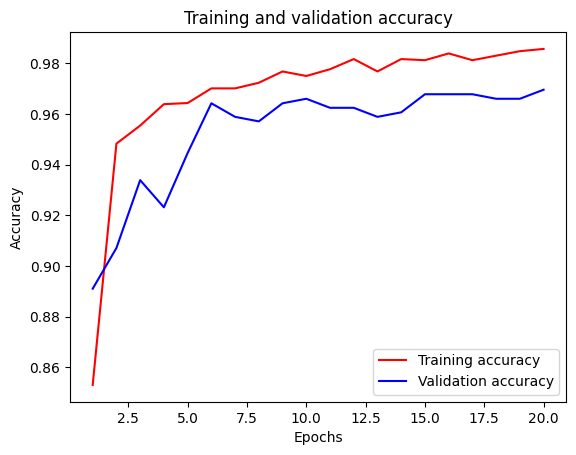

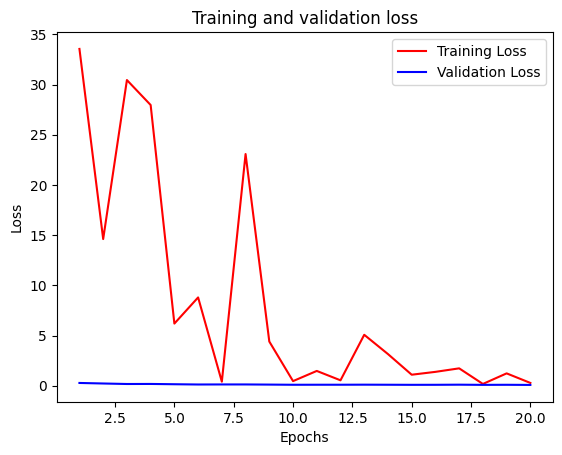

[[198  12]
 [ 27 323]]


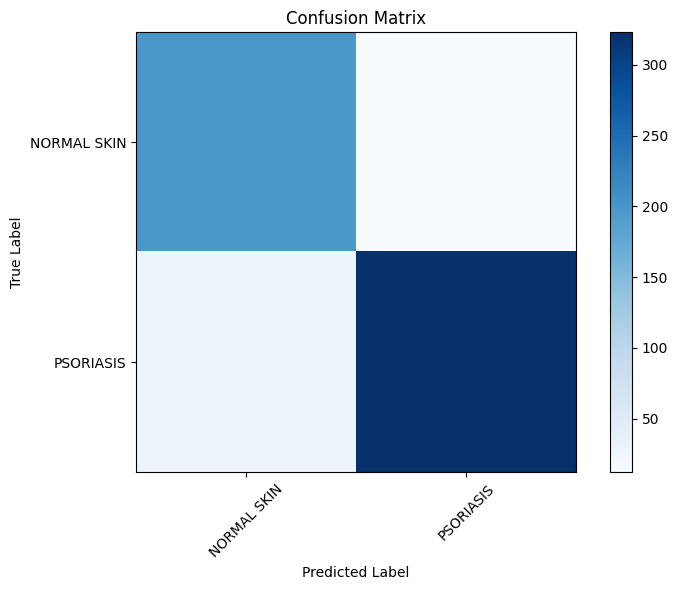

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary


# Define data generators
image_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data
train_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Load validation data
val_data_loader = image_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Train the model
history = model.fit(
    train_data_loader,
    validation_data=val_data_loader,
    epochs=20,
)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)

# Print evaluation metrics
print('\nTest accuracy:', test_acc)

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [42]:
import numpy as np
from sklearn.metrics import classification_report

# Predict test data
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels
true_labels = val_data_loader.classes

# Print classification report
print(classification_report(true_labels, test_pred_classes, digits = 5))



18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step
              precision    recall  f1-score   support

           0    0.96154   0.95238   0.95694       210
           1    0.97159   0.97714   0.97436       350

    accuracy                        0.96786       560
   macro avg    0.96656   0.96476   0.96565       560
weighted avg    0.96782   0.96786   0.96783       560

